In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
transactions_df = pd.read_csv('../data/raw/transactions.csv')
calls_df = pd.read_csv('../data/raw/support_calls.csv')
info_df = pd.read_csv('../data/raw/customers.csv')

In [7]:
print("Transactions head:")
print(transactions_df.head())

print("\nCustomer Calls head:")
print(calls_df.head())

print("\nCustomer Info head:")
print(info_df.head())

Transactions head:
   customer_id transaction_date  transaction_amount product_category
0       599576       2023-04-12              642.96         Mortgage
1       434042       2024-08-14             2214.11      Credit Card
2       821072       2023-06-07             1039.65        Insurance
3       562577       2024-12-26             4479.97         Mortgage
4       746844       2024-05-18             3239.45        Insurance

Customer Calls head:
   call_id  customer_id   call_date   issue_category  \
0  7460862       293093  2024-01-30  Payment Problem   
1  1218276       344660  2024-05-05        Complaint   
2  4009456       235984  2024-02-16  General Inquiry   
3  7720697       157184  2024-06-07  General Inquiry   
4  7844407       605912  2024-11-30        Complaint   

                                     call_transcript  
0  Major analysis build bad voice listen discussi...  
1  Remember you choice reflect become natural so ...  
2  Management relationship painting almost 

In [8]:
print("\nMissing values in Transactions:")
print(transactions_df.isnull().sum())

print("\nMissing values in Calls:")
print(calls_df.isnull().sum())

print("\nMissing values in Info:")
print(info_df.isnull().sum())


Missing values in Transactions:
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64

Missing values in Calls:
call_id            0
customer_id        0
call_date          0
issue_category     0
call_transcript    0
dtype: int64

Missing values in Info:
customer_id    0
age            0
region         0
join_date      0
dtype: int64


In [9]:
merged_df = pd.merge(transactions_df, info_df, on='customer_id', how='left')

In [10]:
merged_df.drop_duplicates(inplace=True)

In [11]:
print("\nMerged dataframe info:")
print(merged_df.info())


Merged dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   transaction_date    100000 non-null  object 
 2   transaction_amount  100000 non-null  float64
 3   product_category    100000 non-null  object 
 4   age                 100000 non-null  int64  
 5   region              100000 non-null  object 
 6   join_date           100000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB
None


In [12]:
print("\nStatistical summary:")
print(merged_df.describe())


Statistical summary:
         customer_id  transaction_amount            age
count  100000.000000       100000.000000  100000.000000
mean   545837.109160         2501.949380      49.206380
std    259807.831764         1439.847311      18.150882
min    100019.000000           10.060000      18.000000
25%    319150.000000         1256.062500      33.000000
50%    544790.000000         2503.390000      49.000000
75%    773365.000000         3744.147500      65.000000
max    999882.000000         4999.980000      80.000000


/Users/vastav/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


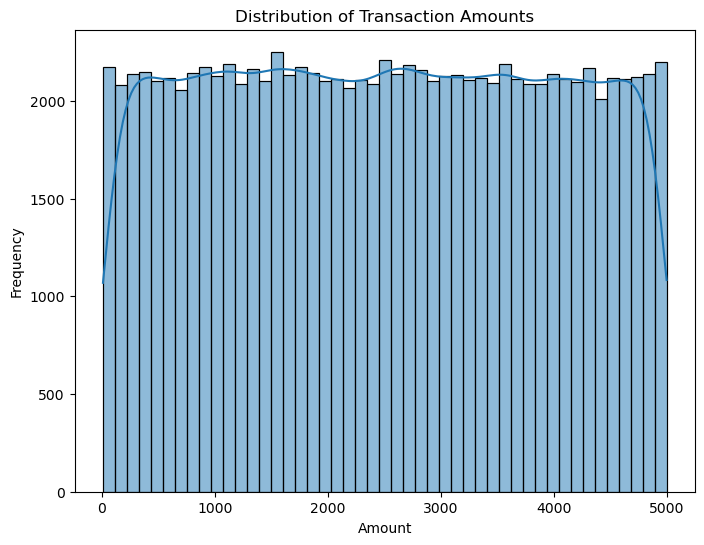

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df['transaction_amount'], kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [14]:
merged_df.to_csv('../data/processed/merged_data.csv', index=False)

In [15]:
print("\nData preprocessing complete. Cleaned dataset saved to '../data/processed/merged_data.csv'")


Data preprocessing complete. Cleaned dataset saved to '../data/processed/merged_data.csv'
